In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
iris=load_iris()

In [3]:
X=pd.DataFrame(iris.data, columns=iris.feature_names)

In [4]:
X.shape

(150, 4)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test=train_test_split(X, test_size=0.20)

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler=StandardScaler()

In [9]:
X_train_scaled=scaler.fit_transform(X_train)

In [10]:
from sklearn.decomposition import PCA

In [11]:
pca=PCA(n_components=2)

In [12]:
pca

PCA(n_components=2)

In [13]:
pca_scaled=pca.fit_transform(X_train_scaled)

In [14]:
pca_scaled.shape

(120, 2)

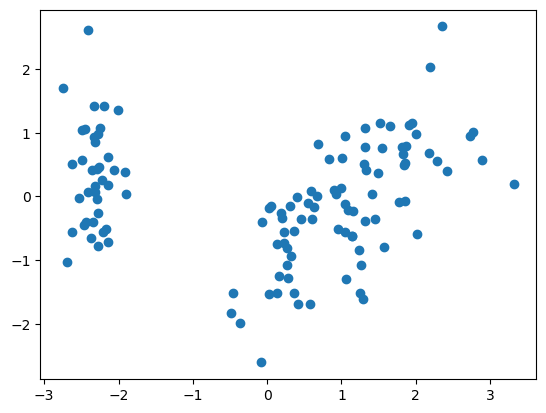

In [15]:
plt.scatter(pca_scaled[:, 0], pca_scaled[:, 1])

In [17]:
# Agglomerative clustering
import scipy.cluster.hierarchy as sc

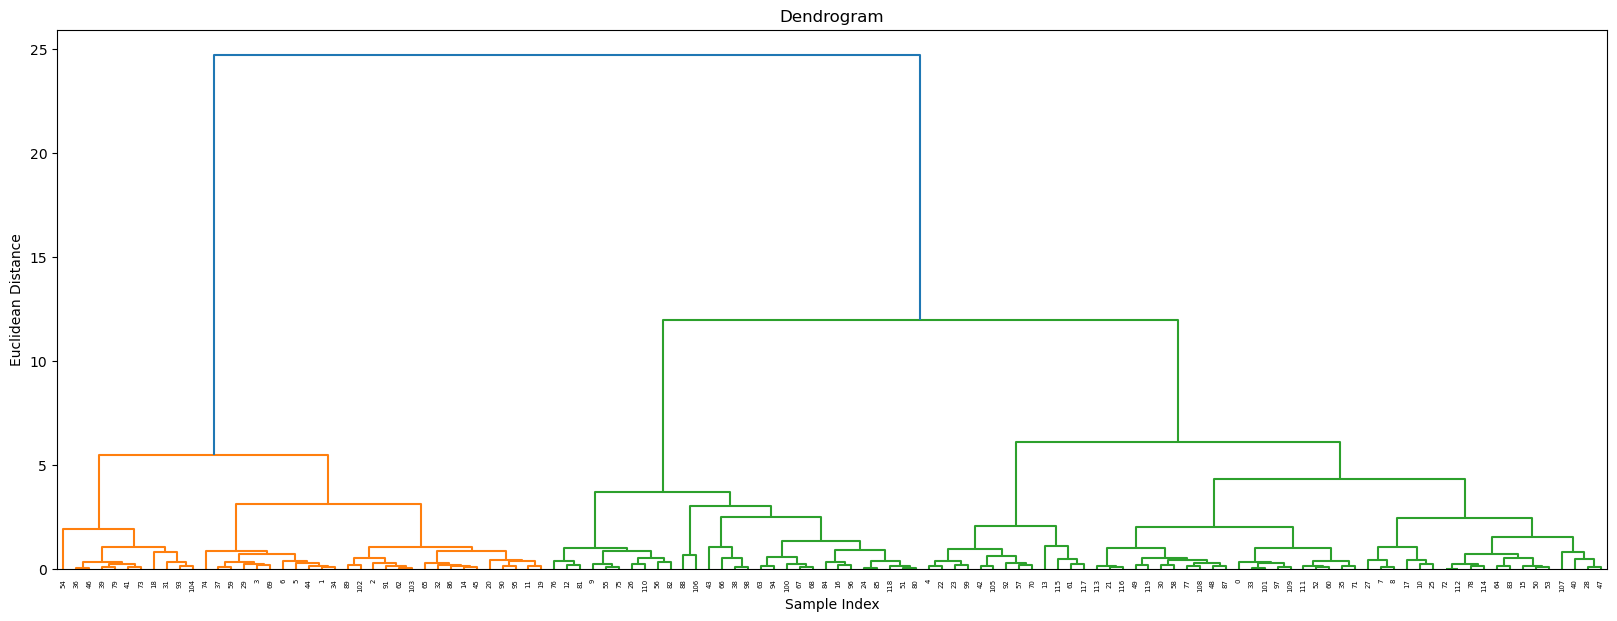

In [24]:
plt.figure(figsize=(20,7))
sc.dendrogram(sc.linkage(pca_scaled, method="ward"))
plt.title("Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Euclidean Distance")
plt.show()

In [21]:
from sklearn.cluster import AgglomerativeClustering

In [25]:
cluster=AgglomerativeClustering(n_clusters=2, affinity="euclidean", linkage="ward")

In [26]:
cluster.fit(pca_scaled)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean')

In [27]:
cluster.labels_

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

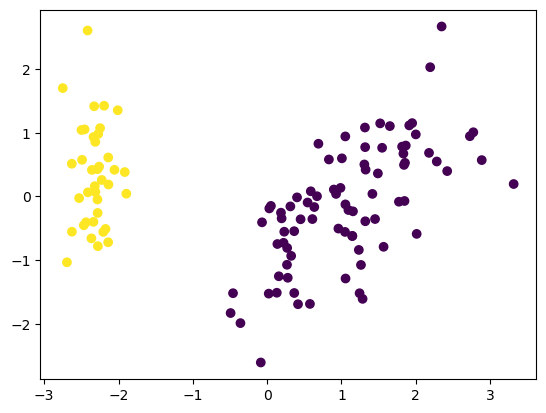

In [28]:
plt.scatter(pca_scaled[:, 0], pca_scaled[:, 1], c=cluster.labels_)

In [29]:
from sklearn.metrics import silhouette_score

In [34]:
silhouette_coefficient=[]
# for silhouette score always start with range 2
for i in range(2,11):
    cluster=AgglomerativeClustering(n_clusters=i, affinity="euclidean", linkage="ward")
    cluster.fit(pca_scaled)
    score=silhouette_score(pca_scaled, cluster.labels_)
    silhouette_coefficient.append(score)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be

In [35]:
silhouette_coefficient

[0.6217050616732067,
 0.54030936518079,
 0.4877909775348638,
 0.433711229960793,
 0.44102285524713475,
 0.41167082663791166,
 0.4074386537396863,
 0.4253625192871832,
 0.4298755634790325]

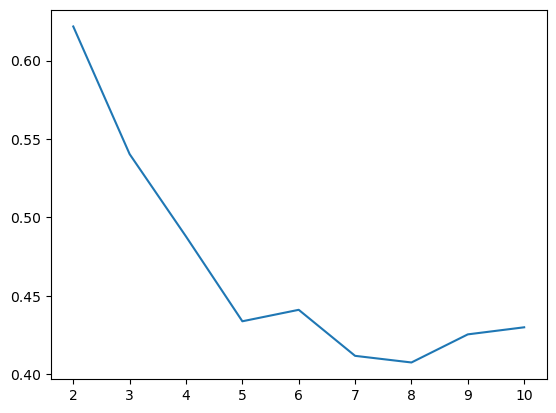

In [36]:
plt.plot(range(2,11), silhouette_coefficient)